In [1262]:
import pandas as pd
import datetime

import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [1263]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data_RAW = pd.read_csv(url)

In [1264]:
covid_data = covid_data_RAW.rename(
        columns = {'Province/State':'subregion'
                   ,'Country/Region':'country'
                   ,'Lat':'lat'
                   ,'Long':'long'
                   }
        )

In [1265]:
covid_data = (covid_data.melt(id_vars = ['country','subregion','lat','long']
                 ,var_name = 'date_RAW'
                 ,value_name = 'confirmed'
                 )
)

In [1266]:
(covid_data
    .filter(['date_RAW'])
)

,date_RAW
0,1/22/20
1,1/22/20
2,1/22/20
3,1/22/20
4,1/22/20
...,...
312982,1/8/23
312983,1/8/23
312984,1/8/23
312985,1/8/23


In [1267]:
(covid_data
    .assign(date = pd.to_datetime(covid_data.date_RAW, format='%m/%d/%y'))
    .filter(['date','date_RAW','confirmed'])
    .groupby(['date','date_RAW'])
    .agg('sum')
    .sort_values('date')
)

,,confirmed
date,date_RAW,
2020-01-22,1/22/20,557
2020-01-23,1/23/20,657
2020-01-24,1/24/20,944
2020-01-25,1/25/20,1437
2020-01-26,1/26/20,2120
...,...,...
2023-01-04,1/4/23,662210623
2023-01-05,1/5/23,662946075
2023-01-06,1/6/23,663664575


In [1268]:
covid_data = covid_data.assign(
         date = pd.to_datetime(covid_data.date_RAW, format='%m/%d/%y')
         )

In [1269]:
covid_data = (covid_data
               .filter(['country', 'subregion', 'date', 'lat', 'long', 'confirmed'])
               .sort_values(['country','subregion','lat','long','date'])
               )


In [1270]:
covid_data.set_index('country', inplace = True)

In [1271]:
pd.set_option('display.max_rows', 155)

In [1272]:
(covid_data
    .reset_index()
    .filter(['country'])
    .drop_duplicates()
    .head(n = 200)
)

,country
0,Afghanistan
1083,Albania
2166,Algeria
3249,Andorra
4332,Angola
...,...
306489,Vietnam
307572,West Bank and Gaza
308655,Winter Olympics 2022
309738,Yemen


In [1273]:
pd.reset_option('display.max_rows')

In [1274]:
covid_data.loc['Indonesia']

,subregion,date,lat,long,confirmed
country,,,,,
Indonesia,NaN,2020-01-22,-0.7893,113.9213,0
Indonesia,NaN,2020-01-23,-0.7893,113.9213,0
Indonesia,NaN,2020-01-24,-0.7893,113.9213,0
Indonesia,NaN,2020-01-25,-0.7893,113.9213,0
Indonesia,NaN,2020-01-26,-0.7893,113.9213,0
...,...,...,...,...,...
Indonesia,NaN,2023-01-04,-0.7893,113.9213,6721692
Indonesia,NaN,2023-01-05,-0.7893,113.9213,6722227
Indonesia,NaN,2023-01-06,-0.7893,113.9213,6722746


In [1275]:
def covid_rename_columns(input_data):
    output_data = input_data.rename(
                              columns = {'Province/State':'subregion'
                                         ,'Country/Region':'country'
                                         ,'Lat':'lat'
                                         ,'Long':'long'
                                         }
                              )
    return(output_data)

In [1276]:
def covid_fill_missing(input_data):
    output_data = input_data.fillna(value = {'subregion':''})
    return(output_data)

In [1277]:
def covid_melt_data(input_data, value_var_name):
    output_data = input_data.melt(id_vars = ['country','subregion','lat','long']
                                  ,var_name = 'date_RAW'
                                  ,value_name = value_var_name
                                  )
    return(output_data)

In [1278]:
def covid_convert_dates(input_data):
    output_data = input_data.assign(
         date = pd.to_datetime(input_data.date_RAW, format='%m/%d/%y')
         )
    output_data.drop(columns = ['date_RAW'], inplace = True)
    return(output_data)

In [1279]:
def covid_rearrange_data(input_data,value_var_name):
    output_data = (input_data
                   .filter(['country', 'subregion', 'date', 'lat', 'long', value_var_name])
                   .sort_values(['country','subregion','date','lat','long'])
                   .reset_index(drop = True)
                   )
    return(output_data)

In [1280]:
def covid_get_data(input_url, value_var_name):
    covid_data_inprocess = pd.read_csv(input_url)
    covid_data_inprocess = covid_rename_columns(covid_data_inprocess)
    covid_data_inprocess = covid_fill_missing(covid_data_inprocess)
    covid_data_inprocess = covid_melt_data(covid_data_inprocess,value_var_name)
    covid_data_inprocess = covid_convert_dates(covid_data_inprocess)
    covid_data_inprocess = covid_rearrange_data(covid_data_inprocess, value_var_name)
    return(covid_data_inprocess)

In [1281]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'


covid_confirmed = covid_get_data(url_confirmed,'confirmed')
covid_deaths = covid_get_data(url_deaths,'dead')

In [1282]:
len(covid_confirmed) # 17204
len(covid_deaths)    

312987

In [1283]:
covid_deaths.drop(columns = ['lat','long'], inplace = True)

In [1284]:
covid_data = (covid_confirmed
                .merge(covid_deaths, on = ['country','subregion','date'], how = 'left')
             )

In [1285]:
print(covid_data)

            country subregion       date        lat       long  confirmed  \
0       Afghanistan           2020-01-22  33.939110  67.709953          0   
1       Afghanistan           2020-01-23  33.939110  67.709953          0   
2       Afghanistan           2020-01-24  33.939110  67.709953          0   
3       Afghanistan           2020-01-25  33.939110  67.709953          0   
4       Afghanistan           2020-01-26  33.939110  67.709953          0   
...             ...       ...        ...        ...        ...        ...   
312982     Zimbabwe           2023-01-04 -19.015438  29.154857     259981   
312983     Zimbabwe           2023-01-05 -19.015438  29.154857     259981   
312984     Zimbabwe           2023-01-06 -19.015438  29.154857     259981   
312985     Zimbabwe           2023-01-07 -19.015438  29.154857     259981   
312986     Zimbabwe           2023-01-08 -19.015438  29.154857     259981   

        dead  
0          0  
1          0  
2          0  
3          0  


In [1286]:
#making for specifically indonesia
covidDF=(covid_data.query('country=="Indonesia"').reset_index(drop=True))

In [1287]:
covidDF.drop('lat', inplace=True, axis=1)
covidDF.drop('long', inplace=True, axis=1)
covidDF.drop('subregion', inplace=True, axis=1)

In [1288]:
covidDF=(covidDF.assign(new_cases=covidDF.confirmed.diff()))
covidDF=(covidDF.assign(death_cases=covidDF.dead.diff()))

In [1289]:
covidDF

,country,date,confirmed,dead,new_cases,death_cases
0,Indonesia,2020-01-22,0,0,NaN,NaN
1,Indonesia,2020-01-23,0,0,0.0,0.0
2,Indonesia,2020-01-24,0,0,0.0,0.0
3,Indonesia,2020-01-25,0,0,0.0,0.0
4,Indonesia,2020-01-26,0,0,0.0,0.0
...,...,...,...,...,...,...
1078,Indonesia,2023-01-04,6721692,160657,597.0,9.0
1079,Indonesia,2023-01-05,6722227,160665,535.0,8.0
1080,Indonesia,2023-01-06,6722746,160673,519.0,8.0
1081,Indonesia,2023-01-07,6723201,160679,455.0,6.0


In [1290]:
#changing the date from the data to date itself
covidDF["date"] = pd.to_datetime(covidDF["date"], format = "%Y-%m-%d")
covidDF

,country,date,confirmed,dead,new_cases,death_cases
0,Indonesia,2020-01-22,0,0,NaN,NaN
1,Indonesia,2020-01-23,0,0,0.0,0.0
2,Indonesia,2020-01-24,0,0,0.0,0.0
3,Indonesia,2020-01-25,0,0,0.0,0.0
4,Indonesia,2020-01-26,0,0,0.0,0.0
...,...,...,...,...,...,...
1078,Indonesia,2023-01-04,6721692,160657,597.0,9.0
1079,Indonesia,2023-01-05,6722227,160665,535.0,8.0
1080,Indonesia,2023-01-06,6722746,160673,519.0,8.0
1081,Indonesia,2023-01-07,6723201,160679,455.0,6.0


In [1291]:
#dropping all the nan values
covidDF=covidDF.dropna()
covidDF

,country,date,confirmed,dead,new_cases,death_cases
1,Indonesia,2020-01-23,0,0,0.0,0.0
2,Indonesia,2020-01-24,0,0,0.0,0.0
3,Indonesia,2020-01-25,0,0,0.0,0.0
4,Indonesia,2020-01-26,0,0,0.0,0.0
5,Indonesia,2020-01-27,0,0,0.0,0.0
...,...,...,...,...,...,...
1078,Indonesia,2023-01-04,6721692,160657,597.0,9.0
1079,Indonesia,2023-01-05,6722227,160665,535.0,8.0
1080,Indonesia,2023-01-06,6722746,160673,519.0,8.0
1081,Indonesia,2023-01-07,6723201,160679,455.0,6.0


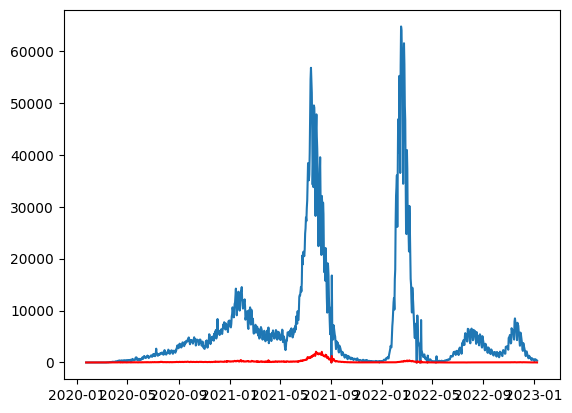

In [1292]:
plt.plot(covidDF['date'],covidDF['new_cases'])
plt.plot(covidDF['date'],covidDF['death_cases'],color='red')

Unsupervised learning

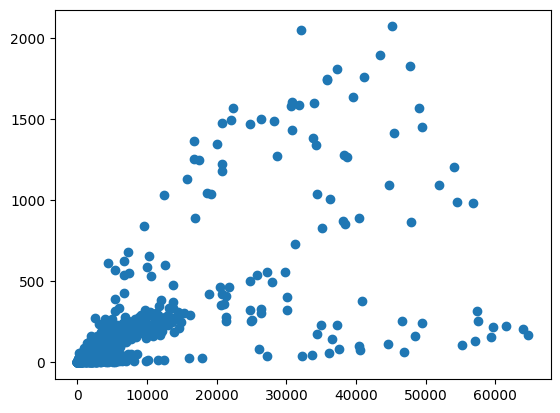

In [1293]:
plt.scatter(covidDF['new_cases'],covidDF['death_cases'])

setting the clusters

In [1294]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [1295]:
y_predicted=km.fit_predict(covidDF[['new_cases','death_cases']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [1296]:

covidDF['cluster']=y_predicted
covidDF

,country,date,confirmed,dead,new_cases,death_cases,cluster
1,Indonesia,2020-01-23,0,0,0.0,0.0,0
2,Indonesia,2020-01-24,0,0,0.0,0.0,0
3,Indonesia,2020-01-25,0,0,0.0,0.0,0
4,Indonesia,2020-01-26,0,0,0.0,0.0,0
5,Indonesia,2020-01-27,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...
1078,Indonesia,2023-01-04,6721692,160657,597.0,9.0,0
1079,Indonesia,2023-01-05,6722227,160665,535.0,8.0,0
1080,Indonesia,2023-01-06,6722746,160673,519.0,8.0,0
1081,Indonesia,2023-01-07,6723201,160679,455.0,6.0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


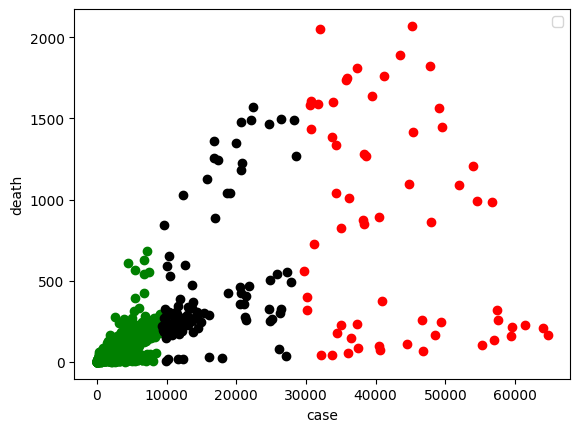

In [1297]:
#cluster the data of covid cases in indonesia
df1=covidDF[covidDF.cluster==0]
df2=covidDF[covidDF.cluster==1]
df3=covidDF[covidDF.cluster==2]

plt.scatter(df1.new_cases,df1['death_cases'],color='green')
plt.scatter(df2.new_cases,df2['death_cases'],color='red')
plt.scatter(df3.new_cases,df3['death_cases'],color='black')


plt.xlabel('case')
plt.ylabel('death')
plt.legend()

In [1298]:
#normalising the data to get more accurate clusters
scaler=MinMaxScaler()
ClusterDataset=scaler.fit_transform(covidDF[['new_cases','death_cases']])


In [1299]:
#pre processing the data
NormalisedData=pd.DataFrame(ClusterDataset,columns=['new_cases','death_cases'])
NormalisedData

,new_cases,death_cases
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
1077,0.009225,0.004350
1078,0.008267,0.003867
1079,0.008019,0.003867
1080,0.007031,0.002900


In [1300]:
y2_predicted=km.fit_predict(NormalisedData)
y2_predicted

array([2, 2, 2, ..., 2, 2, 2])

In [1301]:
NormalisedData['cluster']=y2_predicted
NormalisedData

,new_cases,death_cases,cluster
0,0.000000,0.000000,2
1,0.000000,0.000000,2
2,0.000000,0.000000,2
3,0.000000,0.000000,2
4,0.000000,0.000000,2
...,...,...,...
1077,0.009225,0.004350,2
1078,0.008267,0.003867,2
1079,0.008019,0.003867,2
1080,0.007031,0.002900,2


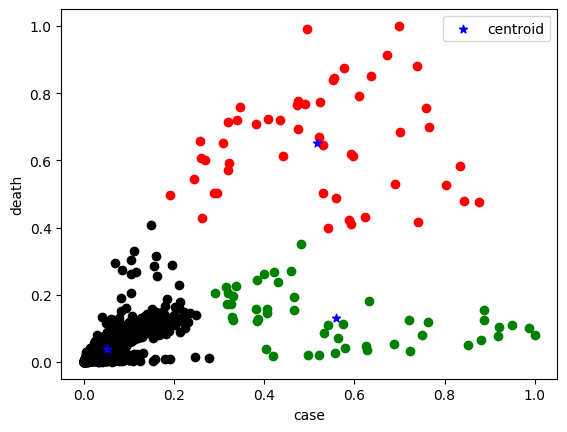

In [1302]:
#using normalised data for making better cluster
df1=NormalisedData[NormalisedData.cluster==0]
df2=NormalisedData[NormalisedData.cluster==1]
df3=NormalisedData[NormalisedData.cluster==2]

plt.scatter(df1.new_cases,df1['death_cases'],color='green')
plt.scatter(df2.new_cases,df2['death_cases'],color='red')
plt.scatter(df3.new_cases,df3['death_cases'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid')

plt.xlabel('case')
plt.ylabel('death')
plt.legend()

In [1303]:
#using elbow method to find the best number of centroids for category

kRange=range(1,10)
elbow=[]
for k in kRange:
    km=KMeans(n_clusters=k)
    km.fit(NormalisedData[['new_cases','death_cases']])
    elbow.append(km.inertia_)

elbow

[50.01608840214213,
 16.736251237090606,
 10.127425382910275,
 7.1079237463741105,
 5.533603039823656,
 4.431860207585364,
 3.6259355564923332,
 2.874582437517335,
 2.4883793085984998]

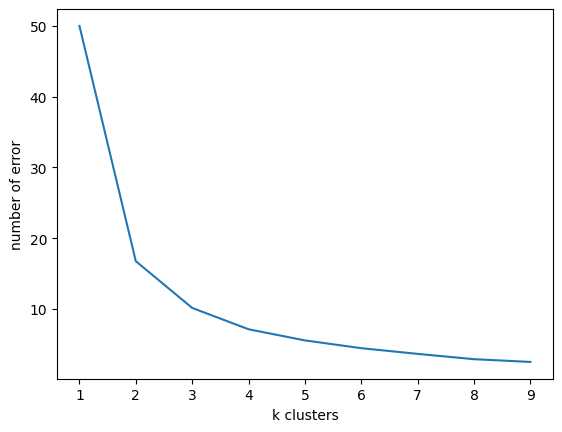

In [1304]:
#plotting the elbow
plt.xlabel('k clusters')
plt.ylabel('number of error')
plt.plot(kRange,elbow)

elbow at 3

Supervised learning 

In [1305]:
#getting only the remaining columns
confirmed=covidDF.iloc[701:1070, 2]
dead=covidDF.iloc[701:1070, 3]
Cov_19=pd.DataFrame(confirmed)
Cov_19['dead']=dead
Cov_19


,confirmed,dead
702,4261412,144047
703,4261667,144053
704,4261667,144053
705,4261879,144063
706,4262157,144071
...,...,...
1066,6714802,160507
1067,6715586,160524
1068,6716124,160537
1069,6716592,160551


In [1306]:

totalDataset=scaler.fit_transform(Cov_19[['confirmed','dead']])
TotalDataScaled=pd.DataFrame(totalDataset,columns=['confirmed','dead'])

In [1307]:
array=[]
index=TotalDataScaled.index
for i in index:
    array.append(i+700)

TotalDataScaled['index']=array
TotalDataScaled=TotalDataScaled.set_index('index')
TotalDataScaled

,confirmed,dead
index,,
700,0.000000,0.000000
701,0.000104,0.000363
702,0.000104,0.000363
703,0.000190,0.000969
704,0.000303,0.001453
...,...,...
1064,0.998944,0.996790
1065,0.999263,0.997820
1066,0.999482,0.998607


In [1308]:
yTrain = covidDF.iloc[0:700, 4]
xTrain = covidDF.iloc[0:700, 2]

yTest = covidDF.iloc[701:1070, 4]
xTest = covidDF.iloc[701:1070, 2]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)




In [1309]:
SVM = SVR(kernel ="rbf", gamma = 1, C = 0.1, epsilon = 1)
SVM.fit(xTrain,yTrain)

SVR(C=0.1, epsilon=1, gamma=1)

In [1310]:
yPredict = SVM.predict(xTest)

In [1311]:
yPredict

array([3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612., 3612.,
       3612., 3612.,

In [1312]:
mean_absolute_error(yTest, yPredict)

5776.783197831978

In [1313]:
scaled_prediction=scaler.fit_transform(xTest,yPredict)
scaled_prediction

array([[0.00000000e+00],
       [1.03828080e-04],
       [1.03828080e-04],
       [1.90147896e-04],
       [3.03340862e-04],
       [3.82331637e-04],
       [4.59286567e-04],
       [5.32576976e-04],
       [6.44141266e-04],
       [7.14988662e-04],
       [8.22888432e-04],
       [9.44631946e-04],
       [1.10912820e-03],
       [1.32614924e-03],
       [1.53706276e-03],
       [1.73209668e-03],
       [1.94748905e-03],
       [2.13234375e-03],
       [2.45889324e-03],
       [2.72192438e-03],
       [3.04480935e-03],
       [3.39090295e-03],
       [3.82005902e-03],
       [4.16818846e-03],
       [4.48252288e-03],
       [5.03708698e-03],
       [5.74759679e-03],
       [6.60916627e-03],
       [7.66943419e-03],
       [8.97441065e-03],
       [1.01653798e-02],
       [1.13571633e-02],
       [1.33433334e-02],
       [1.61975877e-02],
       [1.94862912e-02],
       [2.35192996e-02],
       [2.82375733e-02],
       [3.32954259e-02],
       [3.74424416e-02],
       [4.39656952e-02],


In [1314]:
dates=covidDF.iloc[701:1070, 1]

In [1315]:
PredictedAndReal2=pd.DataFrame(dates)

In [1316]:
PredictedAndReal2['new_cases_real']=TotalDataScaled['confirmed']
PredictedAndReal2['Cases_predicted']=scaled_prediction
PredictedAndReal2

,date,new_cases_real,Cases_predicted
702,2021-12-24,0.000104,0.000000
703,2021-12-25,0.000190,0.000104
704,2021-12-26,0.000303,0.000104
705,2021-12-27,0.000382,0.000190
706,2021-12-28,0.000459,0.000303
...,...,...,...
1066,2022-12-23,0.999482,0.998944
1067,2022-12-24,0.999673,0.999263
1068,2022-12-25,1.000000,0.999482
1069,2022-12-26,NaN,0.999673


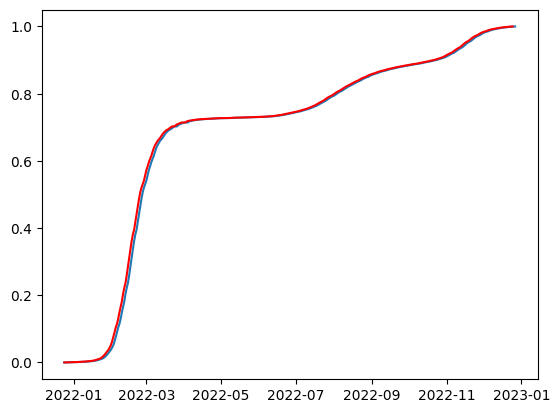

In [1317]:
plt.plot(PredictedAndReal2['date'],PredictedAndReal2['Cases_predicted'])
plt.plot(PredictedAndReal2['date'],PredictedAndReal2['new_cases_real'],color='red')

In [1318]:
yTrain = covidDF.iloc[0:700 , 5]
xTrain = covidDF.iloc[0:700, 3]

yTest = covidDF.iloc[701:1070, 5]
xTest = covidDF.iloc[701:1070, 3]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)

In [1319]:
SVM = SVR(kernel ="rbf", gamma = 1.0, C = 0.01, epsilon = 0.01)
SVM.fit(xTrain,yTrain)

yPredict = SVM.predict(xTest)

In [1320]:
yPredict

array([98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5,
       98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98.5, 98

In [1321]:
mean_absolute_error(yTest, yPredict)

85.00677506775068

In [1322]:
scaled_prediction=scaler.fit_transform(xTest,yPredict)
scaled_prediction

array([[0.00000000e+00],
       [3.63350088e-04],
       [3.63350088e-04],
       [9.68933567e-04],
       [1.45340035e-03],
       [2.05898383e-03],
       [2.48289227e-03],
       [2.84624235e-03],
       [2.96735905e-03],
       [3.02791740e-03],
       [3.33070914e-03],
       [3.51238418e-03],
       [3.75461757e-03],
       [4.17852601e-03],
       [4.48131775e-03],
       [4.84466784e-03],
       [4.96578453e-03],
       [5.38969297e-03],
       [5.87415975e-03],
       [6.23750984e-03],
       [6.54030158e-03],
       [7.02476836e-03],
       [7.26700176e-03],
       [7.44867680e-03],
       [7.69091019e-03],
       [8.23593532e-03],
       [8.78096046e-03],
       [9.20486889e-03],
       [9.32598559e-03],
       [9.62877733e-03],
       [1.04765942e-02],
       [1.09005026e-02],
       [1.21116696e-02],
       [1.25355780e-02],
       [1.29594865e-02],
       [1.33833949e-02],
       [1.44128868e-02],
       [1.55029371e-02],
       [1.65324290e-02],
       [1.82280627e-02],


In [1323]:
dates=covidDF.iloc[701:1070, 1]

In [1324]:
PredictedAndReal1=pd.DataFrame(dates)

In [1325]:
PredictedAndReal1['deaths_real']=TotalDataScaled['dead']
PredictedAndReal1['deaths_predicted']=scaled_prediction
PredictedAndReal1

,date,deaths_real,deaths_predicted
702,2021-12-24,0.000363,0.000000
703,2021-12-25,0.000969,0.000363
704,2021-12-26,0.001453,0.000363
705,2021-12-27,0.002059,0.000969
706,2021-12-28,0.002483,0.001453
...,...,...,...
1066,2022-12-23,0.998607,0.996790
1067,2022-12-24,0.999455,0.997820
1068,2022-12-25,1.000000,0.998607
1069,2022-12-26,NaN,0.999455


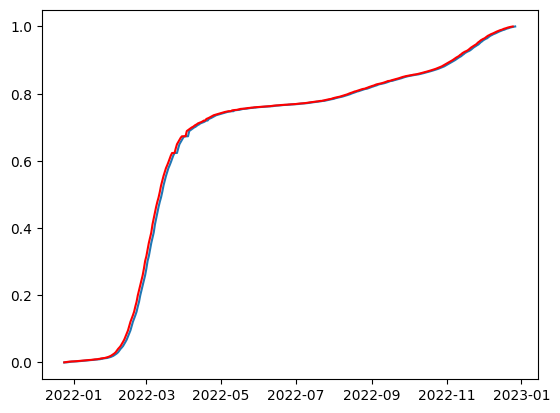

In [1326]:
plt.plot(PredictedAndReal1['date'],PredictedAndReal1['deaths_predicted'])
plt.plot(PredictedAndReal1['date'],PredictedAndReal1['deaths_real'],color='red')

In [1327]:
#predict the prediction of death using the cases
yTrain = covidDF.iloc[0:700, 5]
xTrain = covidDF.iloc[0:700, 4]

yTest = covidDF.iloc[701:1070, 5]
xTest = covidDF.iloc[701:1070, 4]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)

In [1328]:
SVM = SVR(kernel ="rbf", gamma = 1.0, C = 0.01, epsilon = 0.01)
SVM.fit(xTrain,yTrain)

yPredict = SVM.predict(xTest)

In [1329]:
yPredict

array([98.49632121, 98.5       , 98.04945053, 98.49613805, 98.48999876,
       98.49945053, 98.49631874, 98.49264241, 98.4963212 , 98.49981684,
       98.49264241, 98.49963369, 98.48631874, 98.49      , 98.49      ,
       98.48632121, 98.48999876, 98.49631997, 98.48632121, 98.5       ,
       98.5       , 98.49999877, 98.49631997, 98.49981684, 98.5       ,
       98.5       , 98.49999877, 98.5       , 98.5       , 98.5       ,
       98.5       , 98.5       , 98.5       , 98.5       , 98.50000123,
       98.5       , 98.5       , 98.5       , 98.5       , 98.5       ,
       98.5       , 98.5       , 98.5       , 98.5       , 98.5       ,
       98.5       , 98.5       , 98.5       , 98.5       , 98.5       ,
       98.5       , 98.5       , 98.5       , 98.5       , 98.5       ,
       98.5       , 98.5       , 98.5       , 98.5       , 98.5       ,
       98.5       , 98.5       , 98.5       , 98.5       , 98.5       ,
       98.5       , 98.5       , 98.5       , 98.5       , 98.5 

In [1330]:
scaled_prediction=scaler.fit_transform(xTest,yPredict)
scaled_prediction

array([[0.00315214],
       [0.00394017],
       [0.        ],
       [0.00327575],
       [0.00429556],
       [0.00299762],
       [0.00292036],
       [0.0027813 ],
       [0.00423375],
       [0.00268859],
       [0.00409469],
       [0.00462004],
       [0.00624247],
       [0.00823573],
       [0.00800396],
       [0.00740134],
       [0.00817392],
       [0.00701505],
       [0.01239222],
       [0.00998177],
       [0.01225316],
       [0.0131339 ],
       [0.01628604],
       [0.01321116],
       [0.01192868],
       [0.02104515],
       [0.02696313],
       [0.0326957 ],
       [0.0402361 ],
       [0.04952254],
       [0.04519608],
       [0.04522698],
       [0.07537316],
       [0.10831608],
       [0.12480299],
       [0.15304861],
       [0.17905374],
       [0.19194042],
       [0.15737507],
       [0.24755091],
       [0.27650731],
       [0.42023857],
       [0.49771316],
       [0.52116876],
       [0.55714021],
       [0.4036126 ],
       [0.57931333],
       [0.723

In [1331]:
dates=covidDF.iloc[701:1070, 1]

In [1332]:
PredictedAndReal=pd.DataFrame(dates)


In [1333]:
PredictedAndReal['deaths_real']=NormalisedData['death_cases']
PredictedAndReal['deaths_predicted']=scaled_prediction
PredictedAndReal

,date,deaths_real,deaths_predicted
702,2021-12-24,0.002900,0.003152
703,2021-12-25,0.000000,0.003940
704,2021-12-26,0.004833,0.000000
705,2021-12-27,0.003867,0.003276
706,2021-12-28,0.004833,0.004296
...,...,...,...
1066,2022-12-23,0.008217,0.014262
1067,2022-12-24,0.006283,0.012114
1068,2022-12-25,0.006767,0.008313
1069,2022-12-26,0.004350,0.007231


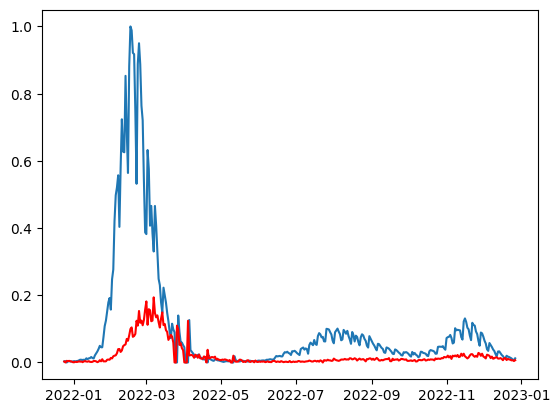

In [1334]:
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_predicted'])
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_real'],color='red')